In [2]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.metrics import confusion_matrix
import matplotlib as plt

import pylab

### The data was derived from randomly selecting 1 or 0 for a decision node in a tandem combined decision tree, then imported and analyzed

In [136]:
decisions = pd.read_excel('C:/Users/nathan.ellis/Documents/Python Scripts/admin_model.xlsx', index = False)

In [233]:
decisions_2 = pd.read_excel('C:/Users/nathan.ellis/Documents/Python Scripts/decision_tree.xlsx', index = False)

### This separates the features from discrete variables for absorption into the algorithm 

In [249]:
#features = ['question_1', 'question_2', 'question_3', 'question_4',
           #  'question_5','question_6','question_7','question_8','question_9', 'question_10', 
           # 'question_11', 'question_12', 'question_13', 'question_14']

### features from the Admin decision tree

features = ['question_1_1', 'question_1_2', 'question_1_3', 'question_1_4',
             'question_1_5','question_1_6','question_1_7','question_1_8','question_1_9', 'question_1_10', 
            'question_1_11', 'question_1_12', 'question_1_13', 'question_1_14']


discrete = ['Invest_admin']

### features from the Maintenace decision tree
features_2 = ['question_1', 'question_2', 'question_3', 'question_4',
             'question_5','question_6','question_7','question_8','question_9', 'question_10', 
            'question_11', 'question_12', 'question_13', 'question_14','question_15','question_16', 'question_17']

discrete_var = ['Invest']

### This calls a Random Forest algortihm. The output is the accuracy of the algorithm to predict the outcome of the test data after being trained by the training data. It's currently at 100% accuracy, which is to be expected.

In [274]:
X1 = decisions_2[features_2]
y = decisions_2[discrete_var]

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = .30, random_state = 10)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

RF = RFC(n_estimators = 20, random_state = 1) 
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
accuracy_rfc = RF.score(X_test, y_test)

X_test['test'] = y_test

X_test['pred'] = y_pred

accuracy_rfc

C:\Users\nathan.ellis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\nathan.ellis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.0

# Admin Model 

   Invest_admin      %
0          1641  16.41
1          1781  17.81
2           148   1.48
3           279   2.79
4           315   3.15
5           268   2.68
6           552   5.52
7          5015  50.15


Text(0.5, 1.0, 'Admin/Staff Support Investment Strategy Probabilities (based on 10000 outcomes from the Work Position and Shop Area Decision Tree)')

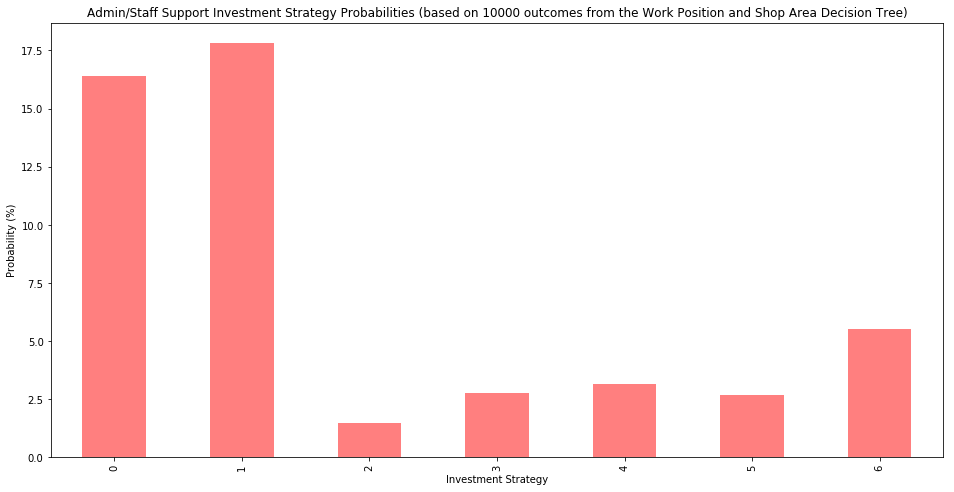

In [269]:
a = pd.DataFrame(decisions_2.Invest_admin.value_counts())

a['%'] = ((a)/10000)*100

print(a.sort_index())

b = a['%'][1:8].sort_index().plot(kind = 'bar', color = 'r', alpha = .5,figsize=(16,8),label = 'Actual Strategy Outcomes (from 10000 data points)')

b.set_xlabel('Investment Strategy')

b.set_ylabel('Probability (%)')

b.set_title('Admin/Staff Support Investment Strategy Probabilities (based on 10000 outcomes from the Work Position and Shop Area Decision Tree)')

# Maintenance Model 

   Invest      %
0    4984  49.84
1     947   9.47
2     980   9.80
3    3088  30.88


Text(0.5, 1.0, 'Work Position and Shop Area Investment Strategy Probabilities (based on 10000 outcomes from the Work Position and Shop Area Decision Tree)')

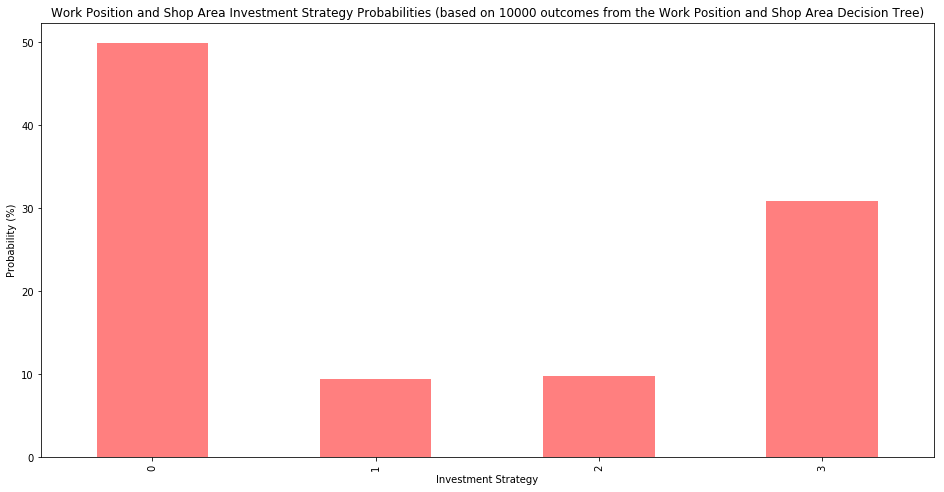

In [268]:
a = pd.DataFrame(decisions_2.Invest.value_counts())

a['%'] = ((a)/10000)*100

print(a.sort_index())


b = a['%'].sort_index().plot(kind = 'bar', color = 'r', alpha = .5,figsize=(16,8),label = 'Actual Strategy Outcomes (from 10000 data points)')

b.set_xlabel('Investment Strategy')

b.set_ylabel('Probability (%)')

b.set_title('Work Position and Shop Area Investment Strategy Probabilities (based on 10000 outcomes from the Work Position and Shop Area Decision Tree)')

# Question importance 

              Importance %
Questions                 
question_1_1      0.315736
question_1_3      0.147156
question_1_2      0.130477
question_1_10    0.0887104
question_1_12    0.0653199
question_1_13    0.0568009
question_1_11    0.0527286
question_1_4     0.0361042
question_1_14    0.0288819
question_1_9     0.0210184
question_1_8     0.0204965
question_1_6     0.0199693
question_1_7     0.0110616
question_1_5    0.00553942


Text(0.5, 1.0, 'Question Importance for Admin/Staff Support Investment Decision Tree (based on 10000 outcomes from the Work Position and Shop Area Decision Tree)')

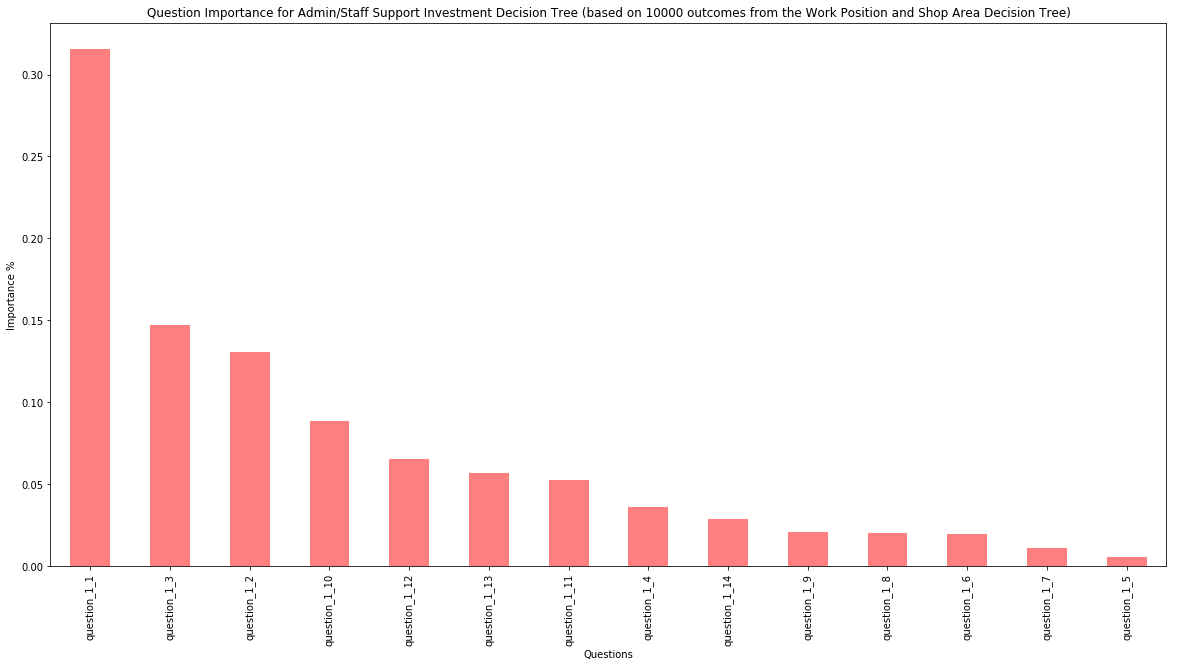

In [261]:
feature_imp = (RF.feature_importances_)

importances = pd.DataFrame([features,feature_imp])

final = importances.transpose()

final.columns = ['Questions', 'Importance %']

final = final.sort_values(by = 'Importance %', ascending = False)

final = final.set_index('Questions')

print(final)

a = final['Importance %'].plot(kind = 'bar', color = 'r', alpha = .5,figsize=(20,10),label = 'Actual Strategy Outcomes (from test data)')
a.set_ylabel('Importance %')

a.set_title('Question Importance for Admin/Staff Support Investment Decision Tree (based on 10000 outcomes from the Work Position and Shop Area Decision Tree)')

            Importance %
Questions               
question_1      0.328061
question_2      0.191549
question_9     0.0660842
question_4     0.0653515
question_10    0.0541641
question_12    0.0527252
question_6     0.0507252
question_5     0.0391546
question_13    0.0369199
question_3     0.0303802
question_15    0.0243235
question_16    0.0156094
question_11     0.012522
question_17    0.0116852
question_8    0.00922921
question_14   0.00637563
question_7    0.00514088


Text(0.5, 1.0, 'Question Importance for Work Position and Shop Area Support Investment Decision Tree (based on 10000 outcomes from the Work Position and Shop Area Decision Tree)')

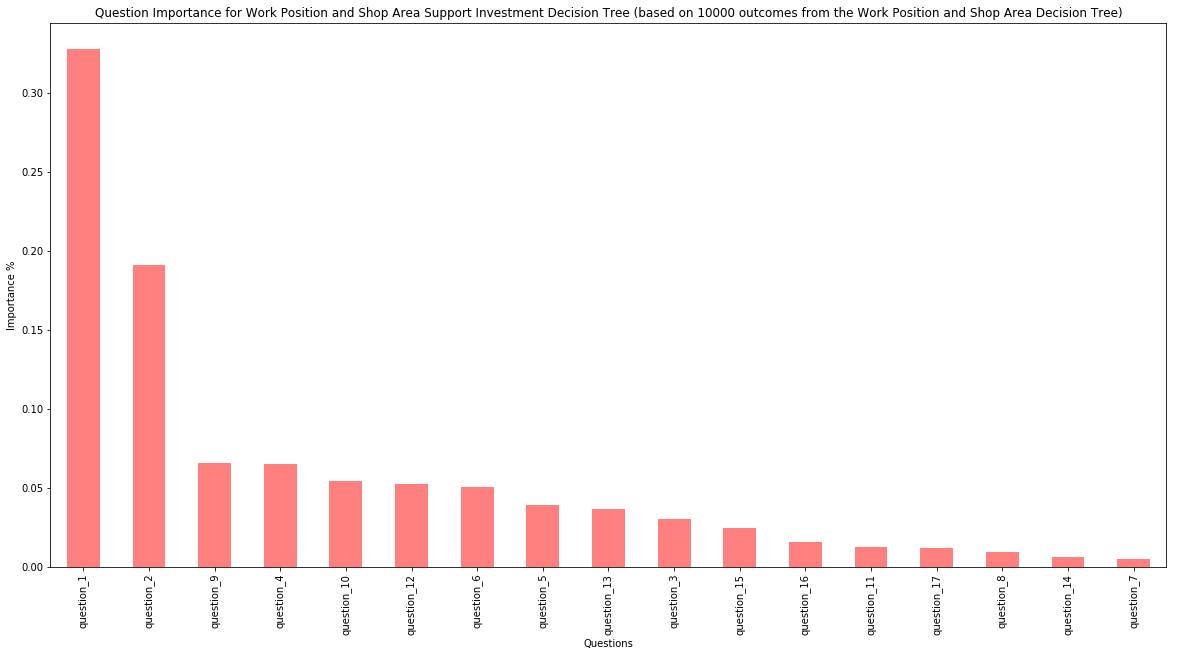

In [276]:
feature_imp = (RF.feature_importances_)

importances = pd.DataFrame([features_2,feature_imp])

final = importances.transpose()

final.columns = ['Questions', 'Importance %']

final = final.sort_values(by = 'Importance %', ascending = False)

final = final.set_index('Questions')

print(final)

a = final['Importance %'].plot(kind = 'bar', color = 'r', alpha = .5,figsize=(20,10),label = 'Actual Strategy Outcomes (from test data)')
a.set_ylabel('Importance %')

a.set_title('Question Importance for Work Position and Shop Area Support Investment Decision Tree (based on 10000 outcomes from the Work Position and Shop Area Decision Tree)')